# MTH9875 Homework 1 

## Chenyu Zhao

### R version: 3.5.1

Assigned: September 12, 2018.
Due: September 26, 2018 by 6pm.

Late homework **will not be accepted**.
$$\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


The following code snippet loads the data required for this homework assignment.

In [1]:
library(repr)
options(repr.plot.height=5)

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/09/9875HW1.zip", destfile="9875HW1.zip")
unzip(zipfile="9875HW1.zip")

## Power laws

### The 80/20 rule again


#### 1. (6 points)

Recall from the lecture that assuming Pareto distribution, the proportion of wealth $W$ owned by a proportion $P$ of the population is given by
<p>
$$
W=  P^{1-\frac1{\alpha}}
$$
where $\alpha$ is the tail exponent.

(a) Code a function in R that returns W for a given $P$ and $\alpha$.

(b) What proportion of wealth is owned by the top $20\%$ of the population assuming $\alpha=1.16$?  What proportion of wealth is owned by the top $4\%$ of the population assuming $\alpha=1.16$?

(c) Superimpose plots of $W$ (on the y-axis) vs $P$ (on the x-axis) for the following values of $\alpha$:
<p>
$$\alpha = \left\{1.1,1.2,1.3,1.4,1.5\right\}.$$
<p>
Draw a vertical dotted line at $P=0.2$.

#### Answer

(a)

In [7]:
W <- function(P, alpha){
    return (P^(1-1/alpha))
}

(b)

In [9]:
print(W(0.2,1.16))
print(W(0.04,1.16))

[1] 0.8009222
[1] 0.6414764


80% wealth is owned by the top 20%; 64% wealth is owned by the top 4%

(c)

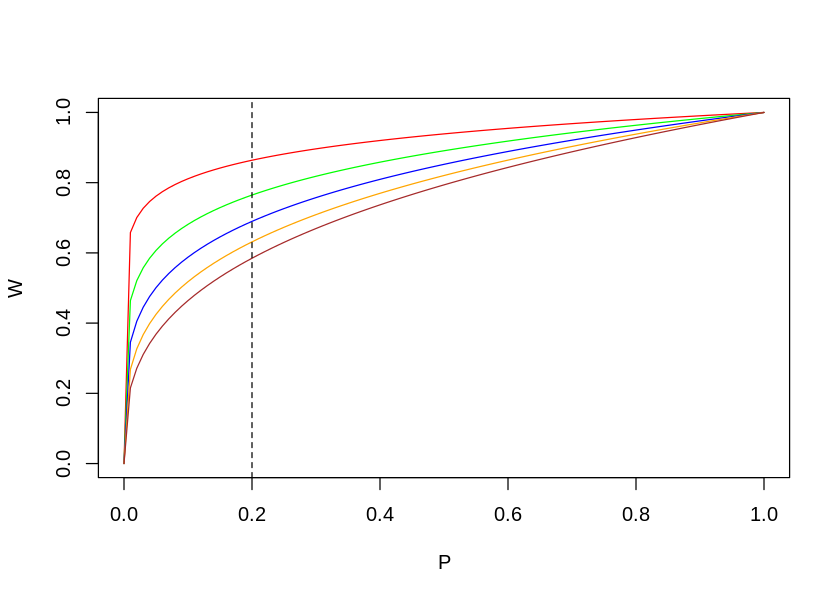

In [22]:
x <- seq(0, 1, by=0.01)
plot(x, W(x, 1.1), type='l', col='red', xlab='P', ylab='W')
lines(x, W(x, 1.2), type='l', col='green')
lines(x, W(x, 1.3), type='l', col='blue')
lines(x, W(x, 1.4), type='l', col='orange')
lines(x, W(x, 1.5), type='l', col='brown')

abline(v = 0.2, lty = 2)

### Zipf's Law

#### 2. (8 points)

(a) Convert the file `SSRN.csv` (which contains paper download numbers and ranks) to a data frame.

(b) Draw a log-log plot of number of paper downloads ($y$) vs download rank ($x$).

(c) Regress $y$ vs $x$ and superimpose the resulting fit on your plot from part (b).

(d) Write down the empirical power-law you have found in the form

$$
y = C x^\alpha.
$$

#### Answer

(a)

In [23]:
df = read.csv('SSRN.csv')
head(df)

Rank,Author,Total.New.Downloads
1,"Fernandez, Pablo",139046
2,"Jensen, Michael C.",66341
3,"Jackson, Matthew O.",41335
4,"Faber, Mebane T.",37648
5,"Damodaran, Aswath",35219
6,"Harvey, Campbell R.",33425


(b) & (c)

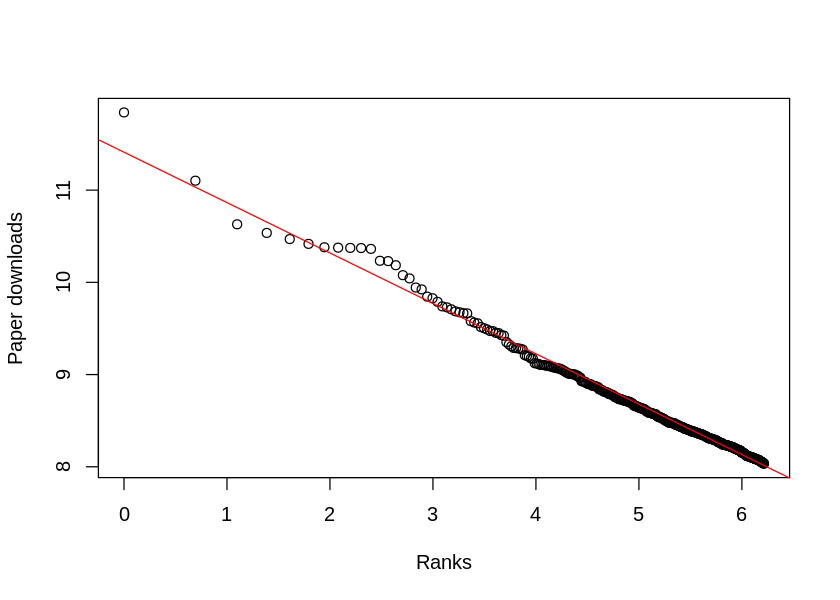

In [24]:
plot(log(df$Rank), log(df$Total.New.Downloads), ylab = "Paper downloads", xlab = "Ranks")
lm <- lm(log(df$Total.New.Downloads) ~ log(df$Rank)) 
abline(lm, col = "red")

(d)

In [27]:
print( exp(lm$coefficients[1]))
print( lm$coefficients[2] )

(Intercept) 
   90312.34 
log(df$Rank) 
   -0.546707 


$y=90312\times x^{-0.5467}$.

#### 3. (8 points)

Repeat all four parts of question 2. for the dataset `Cities.csv`.

#### Answer 

(a)

In [31]:
df = read.csv('Cities.csv')
head(df)

Name,Population
New York City,8491079
Los Angeles,3928864
Chicago,2722389
Houston,2239558
Philadelphia,1560297
Phoenix,1537058


(b) & (c)

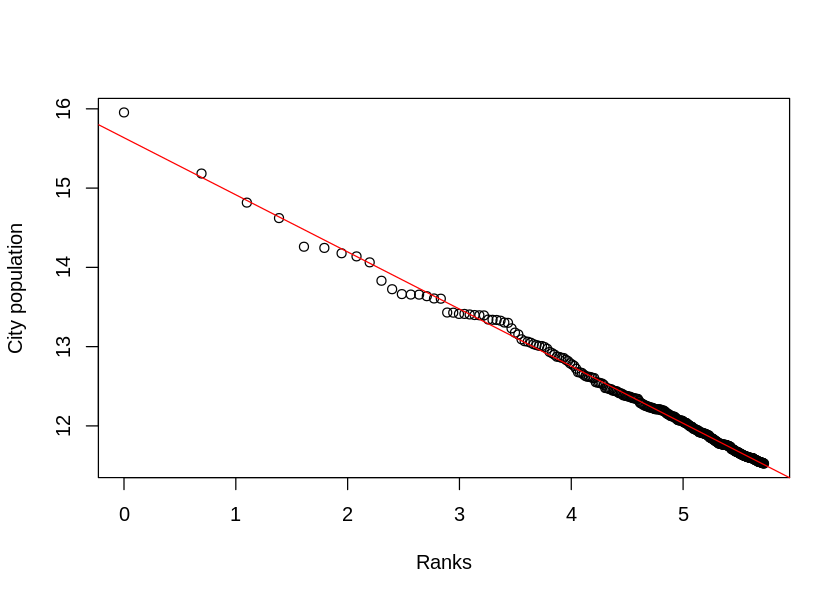

In [37]:
plot(log(rank(-df$Population)), log(df$Population), ylab = "City population", xlab = "Ranks")
lm <- lm(log(df$Population) ~ log(rank(-df$Population))) 
abline(lm, col = "red")

(d)

In [35]:
print( exp(lm$coefficients[1]))
print( lm$coefficients[2] )

(Intercept) 
    6172140 
log(rank(-df$Population)) 
               -0.7206535 


$y=6172140 \times x^{-0.7206}$.

## Stylized facts

#### 4. (12 points.)

(a) Assuming that SPX daily returns are Student-t distributed with $\nu=3$, mean $0$ and standard deviation of $1\%$,  what is the chance of a daily move of more than $10\%$?  Of more than $20\%$? How many years should we expect to wait to get moves of over $10\%$ and $20\%$ respectively? 
(Over $10\%$ means $|return|>0.1!)$.

(b) Repeat the same computation assuming SPX daily returns are normally distributed.  Include in your answer all steps in your computation.

Recall that the SPX dropped $23\%$ on October 19, 1987.  
   
(c) Should this one-day move have been unexpected?  

(d) How many years would we expect to wait to get a move of this magnitude assuming SPX returns are normally distributed?  

(e) Compare your answer with the life of the universe so far (around 13.7 billion years).

#### Answer

(a) a student-t variable's std is $\sqrt{\frac{v}{v-2}}$, when $v=3$, its std should be $\sqrt{3}$. So $y = 0.01 \frac{x}{\sqrt{3}}$, where x is a standard student-t variable, has std 1%.

In [41]:
p1 = 2 * (1 - pt(sqrt(3) * 10, 3) )
p1
p2 = 2 * (1 - pt(sqrt(3) * 20, 3) )
p2
t1 = 1/p1/252
t1
t2 = 1/p2/252
t2

[1] 0.0004193742

[1] 5.289292e-05

[1] 9.462322

[1] 75.0243

the chance of a daily move of more than 10% is 0.00042, expected year is 9.5.

the chance of a daily move of more than 20% is 0.000053, expected year is 75.

(b)

In [48]:
p1 = 2 * pnorm(10,lower.tail = FALSE) 
p1
p2 = 2 * pnorm(20,lower.tail = FALSE) 
p2
t1 = 1/p1/252
t1
t2 = 1/p2/252
t2

[1] 1.523971e-23

[1] 5.507248e-89

[1] 2.603891e+20

[1] 7.205511e+85

the chance of a daily move of more than 10% is 1.5e-23, expected year is 2.6e+20.

the chance of a daily move of more than 20% is 5.5e-89, expected year is 7.2e+85.

(c) this one-day move was unexpected

(d)

In [50]:
p = 2 * pnorm(23, lower.tail = FALSE)
t = 1/p/252
t

[1] 8.513239e+113

we expect to wait 8.5e+113 years

(e)

It is much longer than the universe's life

#### 5.  (0 points)
Run my R-code in `9875Lecture1-2019.ipynb` and try to understand how it works.

#### 6. (6 points) 

The code snippet below loads the data file `spxVIX.rData`.  

(a) Write R-code to compute 
   - The average log-return of SPX conditional on the log-return being non-negative.
   - The average log-return of SPX conditional on the log-return being negative.

(b) What proportion of all moves are up-moves? Down-moves?  
   
(c) Relate your findings to one of the Rama Cont stylized facts.


In [51]:
library(quantmod)
load("spxVix.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [52]:
tail(spxVixData)

           Cl.GSPC Cl.VIX
2019-08-29 2924.58  17.88
2019-08-30 2926.46  18.98
2019-09-03 2906.27  19.66
2019-09-04 2937.78  17.33
2019-09-05 2976.00  16.27
2019-09-06 2978.71  15.00

#### Answer

(a)

In [56]:
spx <- spxVixData[,"Cl.GSPC"]
ret <- log(spx/lag(spx))
ret <- ret[!is.na(ret)]

avg_non_neg <- mean(ret[ret >= 0])
avg_neg <- mean(ret[ret < 0])

avg_non_neg
avg_neg

[1] 0.007200336

[1] -0.007686027

The average log-return of SPX conditional on the log-return being non-negative is 0.0072

The average log-return of SPX conditional on the log-return being negative is -0.0077

(b)

In [58]:
up <- length(ret[ret > 0])/length(ret)
down <- length(ret[ret < 0])/length(ret)
up
down

[1] 0.5346349

[1] 0.4646964

proportion of all moves are up-moves is 53.5%

proportion of all moves are down-moves is 46.5%

(c)

Gain/loss asymmetry: one observes large drawdowns in stock prices and stock index values but not
equally large upward movements

#### 7. (8 points) 

The DAX is a German stock index analogous to the SPX index.  VDAX is the volatility index (VIX) of DAX.

(a) Using the lecture code as a template, use the quantmod package to download time series of DAX and VDAX.

(b) Regress VDAX log returns vs DAX log returns. What is the $R^2$ of this regression? What is the correlation? 

(c) Draw a scatter plot of VDAX log returns vs DAX log returns. Superimpose your linear fit from part (b) to make a diagram exactly like Figure 19 of Lecture 1.

**Note** Yahoo tickers for the DAX and VDAX are `"^GDAXI"` and `"^VDAX"` respectively.

#### Answer

(a)

In [60]:
library(xts)
library(zoo)
library(quantmod)
library(boot)
getSymbols("^GDAXI",from="1927-01-01") 
getSymbols("^VDAX",from="1927-01-01")

m <- specifyModel(Cl(GDAXI)~Cl(VDAX))
DaxData <- modelData(m)
head(DaxData)

Warning message:
“^GDAXI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "GDAXI"

Warning message:
“^VDAX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "VDAX"

           Cl.GDAXI Cl.VDAX
2005-11-16  5081.46   14.65
2005-11-17  5099.72   14.54
2005-11-18  5123.50   14.35
2005-11-21  5170.61   13.56
2005-11-22  5174.72   13.69
2005-11-23  5196.08   13.11

(b)

In [64]:
dax <- DaxData[,"Cl.GDAXI"]
vdax <- DaxData[,"Cl.VDAX"]

dax_ret <- log(dax/lag(dax))
dax_ret <- dax_ret[!is.na(dax_ret)]
vdax_ret <- log(vdax/lag(vdax))
vdax_ret <- vdax_ret[!is.na(vdax_ret)]

lm = lm(vdax_ret ~ dax_ret)
r2 = summary(lm)$r.squared
r2
corr = cor(vdax_ret, dax_ret)
corr

[1] 0.5129645

,Cl.GDAXI
Cl.VDAX,-0.7162154


R-square is 0.513, correlation is  -0.716

(c)

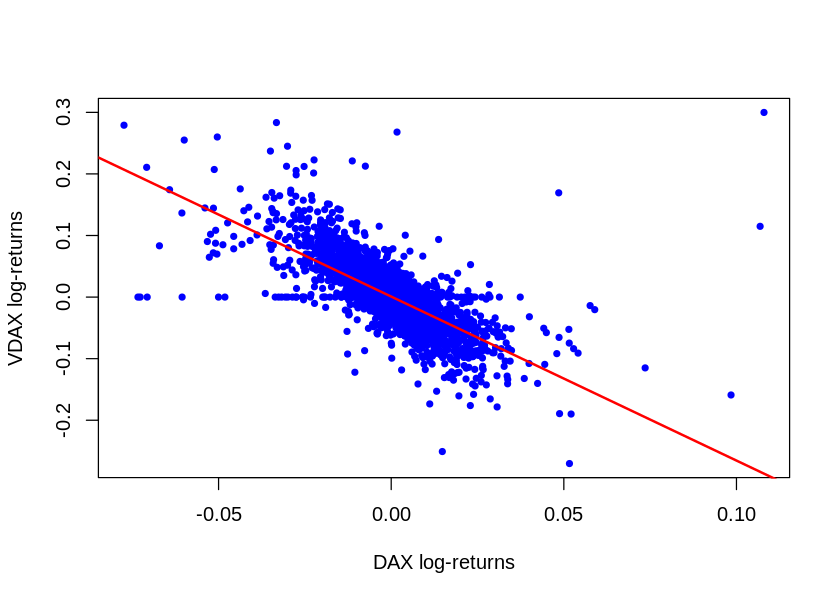

In [65]:
plot(as.numeric(dax_ret), as.numeric(vdax_ret), xlab = "DAX log-returns", ylab = "VDAX log-returns", pch=20, col="blue" )
abline(lm, col = 'red', lwd=2)